**Understanding Convolutional Neural Networks(CNNs):** These are feed forward neural networks for processing Visual/Image data,they work just like the normal feed forward networks but in more dimensions due the image data being in multi-dimensional matrix form. An image matrix would have 3-main dimensions which are the "Height"(1-dimension),the "Width"(1-dimension) & the "Channel" the "Channel" represents the colour information of the image & are the values of the image matrix,for a black & white/grey-scale image the "Channel" would be a single value vector,if it's a coloured image the channel would be a 3 value vector representing values for "Red,Green & Blue".<br>
The image data is fed to the network as a whole matrix,the weights of the network would be smaller matrices of random values,built as filters to screen through smaller feature spaces of the image matrix(ie mathematically breaking them down)analyse the features of the image,process the features(ie adding bias matrix & doing the activation operation which would produce a single value for every screened feature space)& register the processed features as values of a product matrix(which would have the same height & width of the image matrix),the product matrix is then fed to a pooling filter,this filter moves the product matrix & registers the important features of the product matrix into a smaller matrix which acts as a summary of the processed image,pooling layers can be of 3 types:
1. MaxPooling: it registers the largest value in every feature space of the product matrix the pooling filter moves through into the smaller summary matrix.
2. AveragePooling: it registers the average of all the values in the every feature space of the product matrix the pooling filter movves through into the smaller summary matrix
3. GlobalPooling: it reduces the image matrix to only the dimensions of its "channel",this will be done making the pooling filter to have same the height & width of the product matrix,it then performs either a MaxPooling operation(as a GlobalMaxPooling filter) or performs an AveragePooling operation(as a GlobalAveragePooling filter) on the reduced image<br>

After pooling,the output is flattened & given as a value to Dense layers that would compute the final output..

This project would be using CNNs for image classification & the data we would be using would folders of different images grouped into 6 tags/categories which are "building,forest,glacier,mountain,street & sea". The task of the convolutional neural network is to class an image to any of these categories after being trained..

**Importing the data**: to do this,we would need the OS library which would help us access the directories of the computer to where we can download the images,we would also need the OpenCV(cv2) to process the images into pixel arrays.

In [1]:
import cv2
import os
import numpy as np

In [2]:
# the aim here is to create a function to import the images into the notebook as numpy arrays,resize them & tag with labels
# in respect to the sub-folders they are located in. we would use the "os" library to access the paths to the main directory for
# the images & their respective class/label sub-folders,we would then use the "cv2" library to read each image & resize them,note
# that by default "cv2" processes coloured images in "BGR" instead of the standard "RGB" so we would need to convert the images back.
img_size = 250 # prefered shape for the images
labels = ['buildings','forest','glacier','mountain','sea','street'] # the classes/labels which are also the name of the image sub-folders
def get_data(data_dir):
    data = []
    for label in labels: 
        path = os.path.join(data_dir, label) # joining the main folder path with the label names to access the sub-folders
        class_num = labels.index(label) # getting the index of each class which would be the numeric target value for each image
        for img in os.listdir(path): # accesing the list of values in the subfolders
            try:
                img_arr = cv2.imread(os.path.join(path, img)) # reading each image into numpy array
                img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr,class_num])
            except Exception as e:
                print(e)
    return data

In [3]:
train_data = get_data('cnn_img/seg_train/seg_train')
test_data = get_data('cnn_img/seg_test/seg_test')

In [ ]:
import matplotlib.pyplot as plt

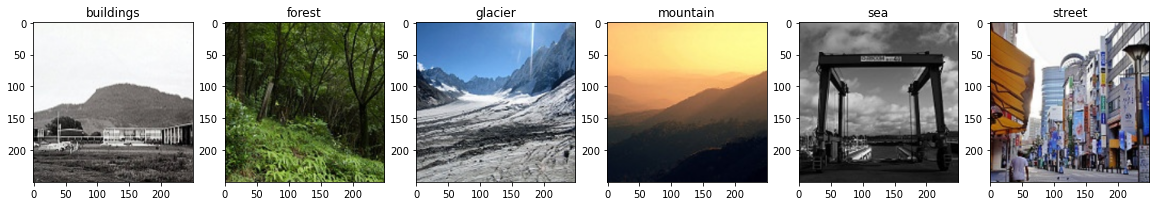

In [4]:
# **Data Visualization** we'll be iterating over the training data to get one image per class & display all of them in a 
# matplotlib subplot..
cat = ['buildings','forest','glacier','mountain','sea','street']
plt.figure(figsize=(20, 20))
i = 0
c = 0
while c < 6:
    for img,lbl in train_data:
        if lbl == i:
            ax = plt.subplot(3, 6, c + 1)
            plt.imshow(img.astype("uint8"))
            plt.title(cat[lbl])
            i = i+1
            c = c+1
            if i == 6:
                i = 0 
                break
            else:
                pass

**Image Data Augmentation**: For a Deep learning model to have the most optimal performance while used for image data predictions,they must be trained with a large amount of data,most times original training data isn't ususally enough hence the need to augment or artificially create more images to increase the size of the training data.<br>
When creating the artificial images some random transformations can be done on the artifiicial images to increase the feature diversity of the dataset & introduce the model to larger scenarios of the same images,some of these transformations include rotation,flipping,shifting,zooming etc 
For image data augmentation in keras we use the **ImageDataGenerator** module,the module set the feaure instances for which the artificial images would be randomly transformed on,some of it's kwargs are:
1. **rotation_range:** specifies the range at which an artificial image can be randomly rotated
2. **width_shift_range:** specifies the range at which the image should be shfited along the width
3. **height_shift_range:** specifies the range at which the image should be shifted along the heught
4. **brightness_range:** specifies the ranges between which the image shoud be brightened
5. **zoom_range:** specifies the range at which an image should be zoomed<br>

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
data_gen = ImageDataGenerator(
    rotation_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=(0.3,0.7),
    zoom_range=0.3,
    channel_shift_range=0.3, # determines the range at which the channels(pixel colors values) should be shifted
    fill_mode='nearest', # determines how the space created by a shifted image should be filled,"nearest" means it should be filled by the nearest pixels
    horizontal_flip=True,# if images should be horizontally flipped
    vertical_flip=True, # if images should be vertically flipped
    rescale= 1.0/255, # the ranged at which the images should be scaled
    data_format = "channels_last" # wheither the shape of the images have the channels as the "first or last values","channels_last" confirms the later
)

After the main generator instance has been created, we would use it to create generator engines for both the training & testing datasets,these engines would be the ones to fetch the original images replicate them with the random transformations set in the "ImageDataGenerator". To create these engines we would use take "flow_from_directory" method of the "ImageDataGenerator" & assign it to avariable. this method allows us to access the train & test images directly from the main folders(s) & perform the generator transformations on them. "flow_from_directory" method will take the path to the main folder as it's first argyment & it'll take kwargs like "target_size"(a tuple for the intended shape),"color_mode"(the color mode of the images either greyscale/rgb/rgba),"class_mode"(wheither the labels are binary,categorical,sparse(numeric) or input(other images),"batch_size"(the batch size at which the images will be fetched),"shuffle"(if the images should be shuffled)..

In [5]:
train_gen = data_gen.flow_from_directory(
    'cnn_img/seg_train/seg_train', 
    target_size=(250, 250),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)
test_gen = data_gen.flow_from_directory(
    'cnn_img/seg_test/seg_test',
    target_size=(250, 250),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [7]:
# ".class_indices" is a dictionary from the generator engine to show each label & it's corresponding tag
train_gen.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

**Creating the Model:** We would be using the "Conv2D" layer from keras for the convolutional layers,"MaxPool2D" for the pooling layers,"Flatten()" to flatten the image matrices into 1-d arrays & "Dense" to produce the final putput<br>
The 1st arg for Conv2D layers is the number of filter units it should have,the 2nd arg is size of each fileter matrix which can be a single integer(if you want both the height & width to be same) or a tuple(the height & width being the 1st & 2nd tuple values respectively). next is the "padding" kwarg which determines wheither to add extra zero value layers to pad the image matrices(this is because when the filter move through the images they're reduced in size ie some information is lost,padding allows for the images to maintain their original sizes when the filters move through them)a value of "valid" means the images hsouldn't be padded while "same" affirms padding,the 2nd kwarg is "activation" which holds the activation function.<br>
the arg for "MaxPool2D" is a tuple to set the dimensions of the pooling filters

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,GlobalAveragePooling2D,SeparableConv2D
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import Input

In [8]:
model = Sequential()
model.add(Conv2D(10,3,strides=2,padding="valid", activation="relu", input_shape=(250,250,3)))
model.add(Conv2D(30, 3,strides=2, padding="same", activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(18, activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

In [9]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 30)        2730      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28830)             0         
                                                                 
 dense (Dense)               (None, 18)                518958    
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                        

In [10]:
# creating the callback function with "EarlyStopping"
early_stop = EarlyStopping(patience=1)

In [11]:
# training the model
model.fit(train_gen, epochs=6,batch_size=256, callbacks=early_stop, validation_data=test_gen)

Epoch 1/6
439/439 [==============================] - 617s 1s/step - loss: 1.7545 - accuracy: 0.2383 - val_loss: 1.6096 - val_accuracy: 0.3517
Epoch 2/6
439/439 [==============================] - 637s 1s/step - loss: 1.6180 - accuracy: 0.3186 - val_loss: 1.4919 - val_accuracy: 0.3703
Epoch 3/6
439/439 [==============================] - 659s 2s/step - loss: 1.4699 - accuracy: 0.3808 - val_loss: 1.3688 - val_accuracy: 0.4420
Epoch 4/6
439/439 [==============================] - 600s 1s/step - loss: 1.3955 - accuracy: 0.4215 - val_loss: 1.3117 - val_accuracy: 0.4567
Epoch 5/6
439/439 [==============================] - 663s 2s/step - loss: 1.3486 - accuracy: 0.4298 - val_loss: 1.2418 - val_accuracy: 0.5127
Epoch 6/6
439/439 [==============================] - 658s 1s/step - loss: 1.3277 - accuracy: 0.4401 - val_loss: 1.2285 - val_accuracy: 0.4763


In [12]:
# predicting with the test data
test_predict = model.predict(test_gen).argmax(axis=1)

In [13]:
y_test = test_gen.classes # numeric values for the actual test data labels

In [14]:
class_names = list(test_gen.class_indices.keys())

In [15]:
print(classification_report(y_test,test_predict,target_names=class_names))

              precision    recall  f1-score   support

   buildings       0.39      0.18      0.24       437
      forest       0.89      0.70      0.79       474
     glacier       0.51      0.12      0.20       553
    mountain       0.60      0.35      0.44       525
         sea       0.34      0.73      0.46       510
      street       0.45      0.80      0.58       501

    accuracy                           0.48      3000
   macro avg       0.53      0.48      0.45      3000
weighted avg       0.53      0.48      0.45      3000



In [16]:
def get_pred_data(path):
    data = []
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img))
            img_arr = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB) #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append(resized_arr.reshape(1,250,250,3))
        except Exception as e:
            print(e)
    return data

In [17]:
pred_data = get_pred_data('cnn_img/seg_pred/seg_pred')

In [23]:
predictions = []
for v in range(len(pred_data)):
    x = model.predict(pred_data[v]).argmax(axis=1)
    predictions.append(x)

In [19]:
import pandas as pd

In [27]:
predictions = [class_names[v[0]] for v in predictions ]

In [39]:
predictions = pd.Series(predictions)

In [54]:
for v in range(6):
    print(f'The model made {round((predictions.value_counts()[class_names[v]]/len(pred_data))*100)}% predictions for {class_names[v]} in the data')

The model made 8% predictions for buildings in the data
The model made 12% predictions for forest in the data
The model made 17% predictions for glacier in the data
The model made 5% predictions for mountain in the data
The model made 21% predictions for sea in the data
The model made 38% predictions for street in the data


**Transfer Learning:** This is a concept in which we import already built & pretrained models to train on our data & use it for predictions. The imported models have been tested & confirmed to be efficient for the intended task. we're going to import the "ResNet50" model & we would train it with our image data,& compare it's evaluation & new data prediction with our custom built model.

In [7]:
# importing the "ResNet50" model
from tensorflow.keras.applications import ResNet50

In [8]:
# to use the "ResNet" model we would need to define parameters like the "input_shape",it's also important to remove the top
# layers of the pretrained model,this is because these models are built for different tasks & most times their main prediction
# layers(the top layers) wouldn't be useful for our intended task,setting the "include_top" kwarg to "False" will remove the top
# layers of the pretrained model,the last kwarg to set is the "weights" kwarg which determines the type of task the model would
# be performing we would set the value to "imagenet" which specifies we are using the model for image classification.
prt_model = ResNet50(input_shape=(250, 250, 3), include_top=False, weights="imagenet")

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94781440/94765736 [==============================] - 191s 2us/step


In [9]:
# with the "trainable" property we freeze the existing weights of the model so that training the new data doesn't update the 
# them
prt_model.trainable = False

In [15]:
# integrating the transferred model as a new model & adding new top layers
model2 = Sequential()
model2.add(prt_model)
model2.add(Flatten())    
model2.add(Dense(36,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(6, activation="softmax"))

In [16]:
model2.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_1 (Dense)             (None, 36)                4718628   
                                                                 
 dropout (Dropout)           (None, 36)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 222       
                                                                 
Total params: 28,306,562
Trainable params: 4,718,850
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
from keras.callbacks import ReduceLROnPlateau

In [18]:
lr_reduce = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=1,
                               verbose=1,
                               min_lr=0.5e-6)

In [21]:
model2.fit(train_gen, epochs=1,batch_size=128, callbacks=lr_reduce,validation_data=test_gen)

439/439 [==============================] - 6097s 14s/step - loss: 2.2720 - accuracy: 0.1409 - val_loss: 1.7914 - val_accuracy: 0.1670 - lr: 0.0010


In [22]:
test_predict2 = model2.predict(test_gen).argmax(axis=1)

In [23]:
y_test = test_gen.classes

In [24]:
class_names = test_gen.class_indices

In [25]:
print(classification_report(y_test,test_predict2,target_names=class_names))

              precision    recall  f1-score   support

   buildings       0.00      0.00      0.00       437
      forest       0.00      0.00      0.00       474
     glacier       0.00      0.00      0.00       553
    mountain       0.00      0.00      0.00       525
         sea       0.00      0.00      0.00       510
      street       0.17      1.00      0.29       501

    accuracy                           0.17      3000
   macro avg       0.03      0.17      0.05      3000
weighted avg       0.03      0.17      0.05      3000



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
